<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-07-17 21:51:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-07-17 21:51:43 (151 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::libpng==1.6.37=hbc83047_0
  - defaults/linux-64::zlib==1.2.11=h7b6447c_3
  - defaults/linux-64::pyqt==5.9.2=py37h05f1152_2
  - defaults/linux-64::qt==5.9.7=h5867ecd_1
  - defaults/linux-64::libxcb==1.14=h7b6447c_0
  - defaults/linux-64::icu==58.2=he6710b0_3
  - defaults/noarch::pyparsing==2.4.7=pyhd3eb1b0_0
  - defaults/linux-64::ncurses==6.2=he6710b0_1
  - defaults/linux-64::tk==8.6.10=hbc83047_0
  - defaults/linux-64::xz==5.2.5=h7b6447c_0
  - defaults/linux-64::certifi==2021.5.30=py37h06a4308_0
  - defaults/linux-64::jpeg==9b=h024ee3a_2
  - defaults/linux-64::sip==4.19.8=py37hf484d3e_0
  - defaults/linux-64::libffi==3.3=he6710b0_2
  - defaults/linux-64::openssl==1.1.1k=h27cfd23_0
  - defaults/linux-64::cycler==0.10.0=py37_0
  - defaults/linux-64::libuuid==1.0.3=h1bed415_2
  - defaults/linux-64::pcre==8.45=h295c9

In [11]:
# If the code Below does not work. Run this line.
!conda remove matplotlib
!conda install matplotlib==3.1.3

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  removed specs:
    - matplotlib


The following packages will be REMOVED:

  _libgcc_mutex-0.1-main
  _openmp_mutex-4.5-1_gnu
  blas-1.0-mkl
  cycler-0.10.0-py37_0
  dbus-1.13.18-hb2f20db_0
  expat-2.2.10-he6710b0_2
  fontconfig-2.13.0-h9420a91_0
  freetype-2.10.4-h5ab3b9f_0
  glib-2.56.2-hd408876_0
  gst-plugins-base-1.14.0-hbbd80ab_1
  gstreamer-1.14.0-hb453b48_1
  icu-58.2-he6710b0_3
  intel-openmp-2020.2-254
  jpeg-9b-habf39ab_1
  kiwisolver-1.2.0-py37hfd86e86_0
  lcms2-2.11-h396b838_0
  libgfortran-ng-7.3.0-hdf63c60_0
  libgomp-9.3.0-h5101ec6_17
  libpng-1.6.37-hbc83047_0
  libtiff-4.1.0-h2733197_1
  libuuid-1.0.3-h1bed415_2
  libxcb-1.14-h7b6447c_0
  libxml2-2.9.10-hb55368b_3
  lz4-c-1.9.2-heb0550a_3
  matplotlib-3.3.1-0
  matplotlib-base-3.3.1-py37h817c723_0
  mkl-2019.4-243
  mkl-service-2.3.0-py37he904b0f_0
  mkl_fft-1.2.0-py37h23d657b_0
  mkl_random-1.1.0-py37hd6b4f25_0
 

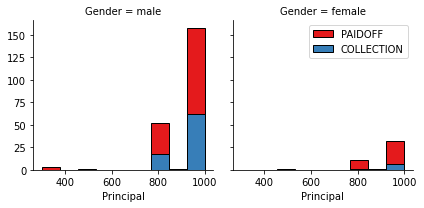

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

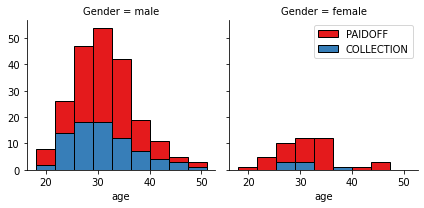

In [14]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


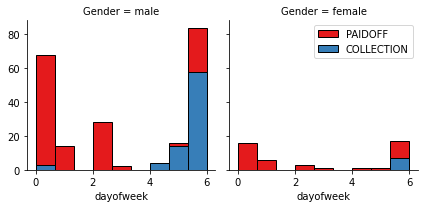

In [15]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [16]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [18]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [19]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [20]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [21]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [22]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [23]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [25]:
# Install in order to split the training dataset
!conda install scikit-learn==0.23.1

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::libpng==1.6.37=hbc83047_0
  - defaults/linux-64::zlib==1.2.11=h7b6447c_3
  - defaults/linux-64::pyqt==5.9.2=py37h05f1152_2
  - defaults/linux-64::qt==5.9.7=h5867ecd_1
  - defaults/linux-64::libxcb==1.14=h7b6447c_0
  - defaults/linux-64::icu==58.2=he6710b0_3
  - defaults/noarch::pyparsing==2.4.7=pyhd3eb1b0_0
  - defaults/linux-64::ncurses==6.2=he6710b0_1
  - defaults/linux-64::tk==8.6.10=hbc83047_0
  - defaults/linux-64::xz==5.2.5=h7b6447c_0
  - defaults/linux-64::certifi==2021.5.30=py37h06a4308_0
  - defaults/linux-64::jpeg==9b=h024ee3a_2
  - defaults/linux-64::sip==4.19.8=py37hf484d3e_0
  - defaults/linux-64::libffi==3.3=he6710b0_2
  - defaults/linux-64::openssl==1.1.1k=h27cfd23_0
  - defaults/linux-64::cycler==0.10.0=py37_0
  - 

In [26]:
# Divide loan_test.csv into train and test dataset in order to find the optimum value of K

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Lets see which k is the optipm
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

print(mean_acc)
print(std_acc)

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
The best accuracy was with 0.7857142857142857 with k= 7


In [28]:
# Use k=7 to train the model
k = 7
#Train the Model 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)
print(neigh)

KNeighborsClassifier(n_neighbors=7)


# Decision Tree


In [31]:
#Import libraries
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Use this criterion to find best paramater for max_depth (1 was the best one)
md = 10
mean_acc = np.zeros((md-1))

for n in range(1,md):
    
    LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    #Train the model
    LoanTree.fit(X_train,y_train)
    #Predict
    predTree = LoanTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, predTree)

print( "The best accuracy was with", mean_acc.max(), "with n=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with n= 1


In [37]:
#Train the Model
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
LoanTree.fit(X,y)
print(LoanTree)

DecisionTreeClassifier(criterion='entropy', max_depth=1)


# Support Vector Machine


In [35]:
# Import libraries
from sklearn import svm

In [38]:
# Use F1 Score to choose the best kernel
from sklearn.metrics import f1_score

kernels = ["linear","poly","rbf","sigmoid"]
ke_opt = {}

for ke in kernels:
    svm_loan = svm.SVC(kernel=ke)
    #Train the model
    svm_loan.fit(X_train, y_train)
    #Predict
    yhat_ke = svm_loan.predict(X_test)
    ke_opt[ke] = f1_score(y_test, yhat_ke, average='weighted')

    
max_v = max(ke_opt.values())
for key in ke_opt:
    if ke_opt[key] == max_v:
        print( "The best accuracy was",max_v, "with kernel =",key)   

The best accuracy was 0.7275882012724117 with kernel = rbf


In [39]:
#Train the Model
svm_loan = svm.SVC(kernel="rbf")
svm_loan.fit(X, y) 
print(svm_loan)

SVC()


# Logistic Regression


In [41]:
#Import libraries
from sklearn.linear_model import LogisticRegression

In [42]:
# Use log loss criterion to choose the best solver and c value.
from sklearn.metrics import log_loss


solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
solv_opt = {}

for solv in solvers:
    for c in range(1,10):
        #Train the model
        LR_loan = LogisticRegression(C=c/100, solver=solv).fit(X_train,y_train)
        #Predict 
        yhat_solv = LR_loan.predict(X_test)
        yhat_prob_solv = LR_loan.predict_proba(X_test)
        lg_l = log_loss(y_test, yhat_prob_solv)
        solv_opt[solv +" c = " + str(c/100)] = lg_l

    

min_v = min(solv_opt.values())
for key in solv_opt:
    if solv_opt[key] == min_v:
        print( "The minimum logloss is",min_v, "with settings, solver=",key)  

The minimum logloss is 0.480455512026997 with settings, solver= lbfgs c = 0.05


In [44]:
#Train the model
LR_loan = LogisticRegression(C=0.05, solver="lbfgs").fit(X,y)
print(LR_loan)

LogisticRegression(C=0.05)


# Model Evaluation using Test set


In [45]:
# Import library
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [46]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-07-17 22:30:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-07-17 22:30:30 (60.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [47]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [48]:
# Arrange the Test Data Set 
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
XN = Feature
XN = preprocessing.StandardScaler().fit(XN).transform(XN)
yn = test_df['loan_status'].values


#Predict values with knn
yhat_kneigh = neigh.predict(XN)

#Predict values with Decision Tree 
predTree = LoanTree.predict(XN)

#Predict values with SVM
yhat_svm = svm_loan.predict(XN)

#Predict values with Logistic Regression
yhat_log = LR_loan.predict(XN)
yhat_prob = LR_loan.predict_proba(XN)

In [54]:
# Accuracy Metrics

#F1

# For Logistic Regression
f1_log = f1_score(yn, yhat_log, average='weighted')
print("F1 LOG",round(f1_log,4))

# For KNN
f1_kneigh = f1_score(yn, yhat_kneigh, average='weighted')
print("F1 kneigh",round(f1_kneigh,4))

# For Decision Tree 
f1_predTree = f1_score(yn, predTree, average='weighted')
print("F1 predTree",round(f1_predTree,4))

#For SVM
f1_svm = f1_score(yn, yhat_svm, average='weighted')
print("F1 svm",round(f1_svm,4))

F1 LOG 0.6304
F1 kneigh 0.7002
F1 predTree 0.6304
F1 svm 0.6213


In [55]:
#Jaccard

#For KNN
jaccard_kneigh = jaccard_score(yn, yhat_kneigh, average="weighted")
print("jaccard_kneigh",round(jaccard_kneigh,4))

#For Logistic Regression
jaccard_log = jaccard_score(yn, yhat_log, average="weighted")
print("jaccard_log",round(jaccard_log,4))

#For SVM
jaccard_svm = jaccard_score(yn, yhat_svm, average="weighted")
print("jaccard_svm",round(jaccard_svm,4))

#For Decision Tree 
jaccard_predTree = jaccard_score(yn, predTree, average="weighted")
print("jaccard_predTree",round(jaccard_predTree,4))


#log_loss
log_loss_logistic = log_loss(yn, yhat_prob)
print("Log loss",round(log_loss_logistic,4))

jaccard_kneigh 0.5731
jaccard_log 0.5487
jaccard_svm 0.535
jaccard_predTree 0.5487
Log loss 0.4824


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.5731  | 0.7002   | NA      |
| Decision Tree      | 0.5487  | 0.6304   | NA      |
| SVM                | 0.535   | 0.6213   | NA      |
| LogisticRegression | 0.5487  | 0.6304   | 0.4824  |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
|---|---|---|---|
| 2020-10-27 | 2.1 | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27 | 2.0 | Malika Singla | Added lab to GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
